# 1. Problem 1: Support Vector Machine Algorithm (25 points)
In this problem, we want to use SVM to identifying the Gender of a Voice. Download the zip file
for homework assignment #4, and use the Voice dataset which was created to identify a voice as
male or female, based upon acoustic properties of the voice and speech. The dataset consists of
3,168 recorded voice samples, collected from male and female speakers. The acoustic properties of
each voice (such as mean frequency (in kHz), spectral flatness, frequency centroid, spectral entropy,
etc.) are measured and included within the CSV.

In [35]:
# Evaluate using Cross Validation
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn import metrics

# read and load the csv data file
filename = '/Users/jeremybouhadana/Downloads/hw04-DataSet/voice.csv'
dataframe = pd.read_csv( filename )

# converting the dataset to a numpy array
array = dataframe.values

# separate array into input and output components
X = array[:,:-1]
Y = array[:,-1]

## (a) Use LabelEncoder to convert string values to integer for labels Y. (2 points)

In [36]:
#Create label Encoder.
le = LabelEncoder()
 
#Use fit_transform function to fit label
Y = le.fit_transform(dataframe['label'])

#Drop labels column
#dataframe.drop("label", axis=1, inplace=True)
 
#Append new array to dataFrame
#dataframe["label"] = Y

dataframe

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


## (b) Standardize your input data using StandardScaler , and split your data into train and test with 20% test size, and ’random state’ =1. (2 points).

In [37]:
#Standardize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## (c) Run SVM with default hyperparameters (no argument to SVC), and measure the accuracy of your model on test set. (3 points).

In [38]:
#Initialize SVM model
model = SVC()
#train models & predict
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#Measure accuracy of model
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9763406940063092


## (d) Use linear, rbf and polynomial kernels as parameters for kernel in SVC and report the accuracy for all three cases on the test set. (6 points)

In [48]:
#Initialize models with kernels
model_linear = SVC(kernel='linear')
model_rbf = SVC(kernel='rbf')
model_poly = SVC(kernel='poly')

#train models 
model_linear.fit(X_train, Y_train)
model_rbf.fit(X_train, Y_train)
model_poly.fit(X_train, Y_train)

#predict
Y_pred_linear = model_linear.predict(X_test)
Y_pred_rbf = model_rbf.predict(X_test)
Y_pred_poly = model_poly.predict(X_test)

#report accuracy
accuracy_linear = metrics.accuracy_score(Y_test, Y_pred_linear)
accuracy_rbf = metrics.accuracy_score(Y_test, Y_pred_rbf)
accuracy_poly = metrics.accuracy_score(Y_test, Y_pred_poly)

print("Accuracy for linear kernel:", accuracy_linear)
print("Accuracy for RBF kernel:", accuracy_rbf)
print("Accuracy for polynomial kernel:", accuracy_poly)


Accuracy for linear kernel: 0.9779179810725552
Accuracy for RBF kernel: 0.9763406940063092
Accuracy for polynomial kernel: 0.9589905362776026


## (e) For your SVM model with linear kernel, perform K-fold cross validation on your training data (use 10 folds, random state =13, shuffle = True) to figure out the optimal value for the regularization hyperparameter C for all integers in the range of [1,26]. Plot the accuracy of the SVM model in terms of the value of hyperparameter C varying from 1 to 26. Choose and report the best value for C. (6 points).

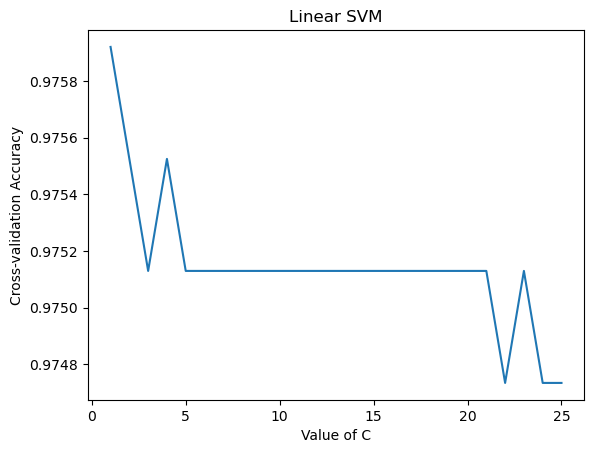

Best value of C: 1


In [40]:
#range
parameter_range = range(1, 26)

#linear kernal model
model = SVC(kernel='linear')

#define K-fold cv gen
cv = KFold(n_splits=10, shuffle=True, random_state=13)

#cross validation over range
cv_scores = []
for c in parameter_range:
    model.set_params(C=c)
    scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

#plot accuracy vs. C
plt.plot(parameter_range, cv_scores)
plt.xlabel('Value of C')
plt.ylabel('Cross-validation Accuracy')
plt.title('Linear SVM')
plt.show()

#best value of C
best_c = parameter_range[np.argmax(cv_scores)]
print('Best value of C:', best_c)

## (f) For your SVM model with rbf kernel, perform K-fold cross validation on your training data (use 10 folds, random state =13, shuffle = True) to figure out the optimal value for the hyperparameter γ taking values from [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. Plot the accuracy of the SVM model in terms of the values of γ. Choose and report the best value for γ. (6 points).

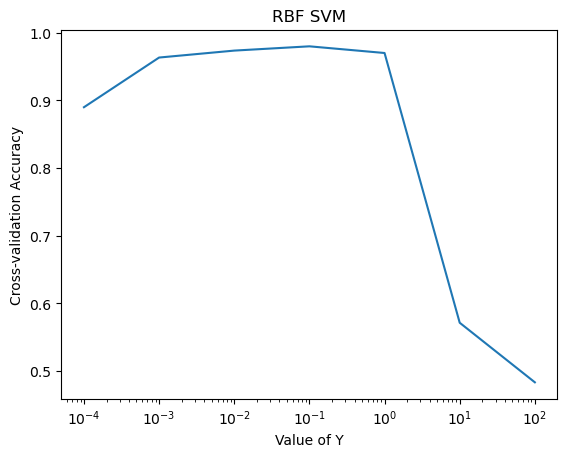

Best value of Y: 0.1


In [49]:
#range
parameter_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

#rbf kernal model
model = SVC(kernel='rbf')

#define K-fold cv gen
cv = KFold(n_splits=10, shuffle=True, random_state=13)

#cross validation over range
cv_scores = []
for gamma in parameter_range:
    model.set_params(gamma=gamma)
    scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

#plot accuracy vs. hyperparamter y
plt.plot(parameter_range, cv_scores)
plt.xscale('log')
plt.xlabel('Value of Y')
plt.ylabel('Cross-validation Accuracy')
plt.title('RBF SVM')
plt.show()

#best value of C
best_y = parameter_range[np.argmax(cv_scores)]
print('Best value of Y:', best_y)

# 2. Problem 2: K-Means and Hierarchical Clustering (12 points)
In this problem, you apply cluster analysis to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. For this problem, from the zip file you downloaded for homework assignment #4, use Mall Customer Segmentation Data which is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis. You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly. Assume that using some data analysis, we find out that gender has no direct relation to segmenting customers. Customer ID is also irrelevant to this clustering analysis. That’s why we can drop them from the feature set. Therefore, work with X as your relevant data for this problem.

In [51]:
!pip install -U yellowbrick
# import necessary packages to the Jupyter notebook
# Create a pipeline that extracts features from the data then creates a model
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# clustering model library
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# read and load the csv data file
filename = "/Users/jeremybouhadana/Downloads/hw04-DataSet/Mall_Customers.csv"
dataset = pd.read_csv(filename)
X = dataset.drop(['Gender','CustomerID'], axis =1)

## (a) Use sklearn function Kmeans() to perform K-Means clustering algorithm on the data, with the number of clusters changing in the range of [1, 15]. Use init=‘k-means++’ and random state = 42 for the initialization of your K-means algorithm. (5 points)

In [54]:
#range
num_clusters = range(1, 15)

#initialization method and random state provided
init = 'k-means++'
random_state = 42

#list to store SSE of each k
sse = []

#KMeans for each k and store the SSE 
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, init=init, random_state=random_state)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

## (b) Plot the effect of increased cluster numbers on inertia score (Sum of squared distances of samples to their closest cluster center). Use the Elbow method to choose the best number of clusters based on intertia scoring. (3 points)

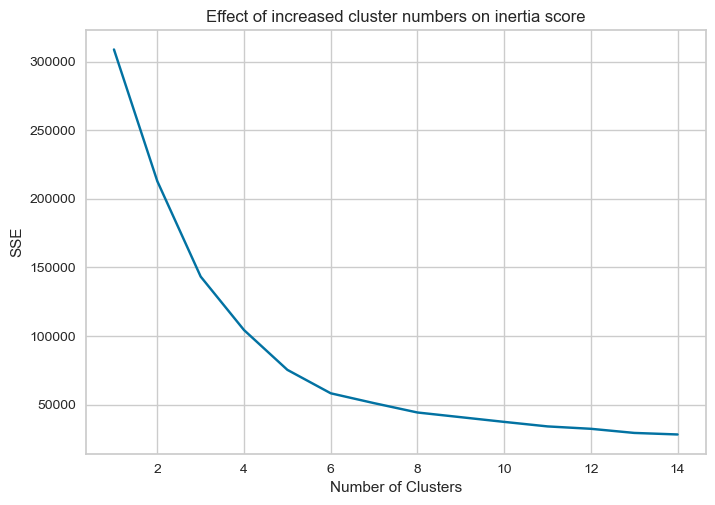

In [62]:
plt.plot(num_clusters, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Effect of increased cluster numbers on inertia score')
plt.show()

From the elbow method, we can see that the SSE starts to level off at around 5 clusters, making this the elbow point and the best number of clusters based on inertia scoring.

## (c) Use the kmeans.labels attribute to report (print) the cluster labels of the observations for the best number of clusters you found using Elbow method. (2 points)

In [59]:
n_clusters = 5

#fit KMeans with the best number of clusters
kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=random_state)
kmeans.fit(X)

print("Cluster labels:")
print(kmeans.labels_)

Cluster labels:
[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## (d) From Yellowbrick library, use KElbowVisualizer to visualize the Elbow plot for K value chaining in the range of (1,15); and use SilhouetteVisualizer to visualize the Silhouette plot for numbers of clusters 2, 3, 4 and 5. (4 points)

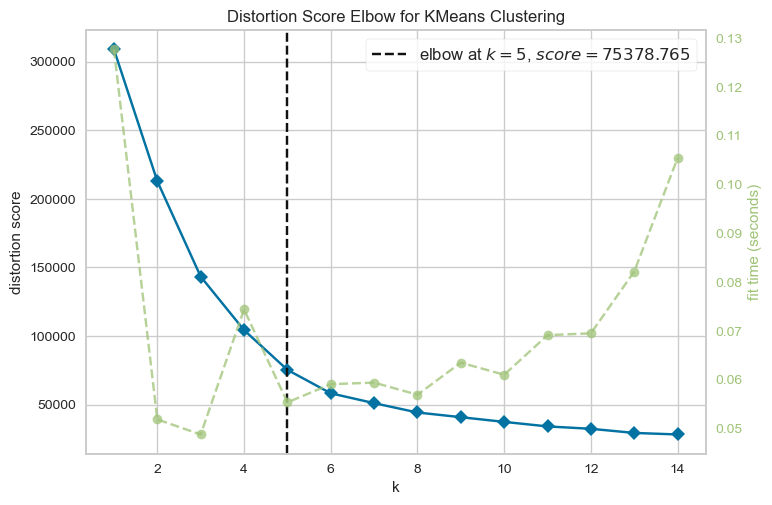

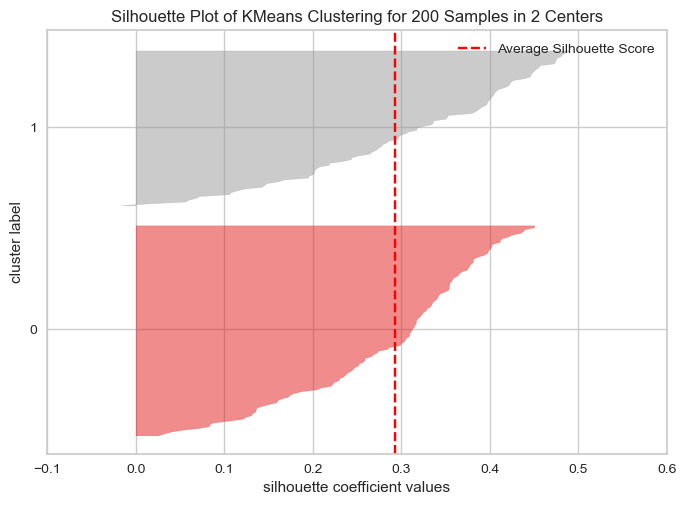

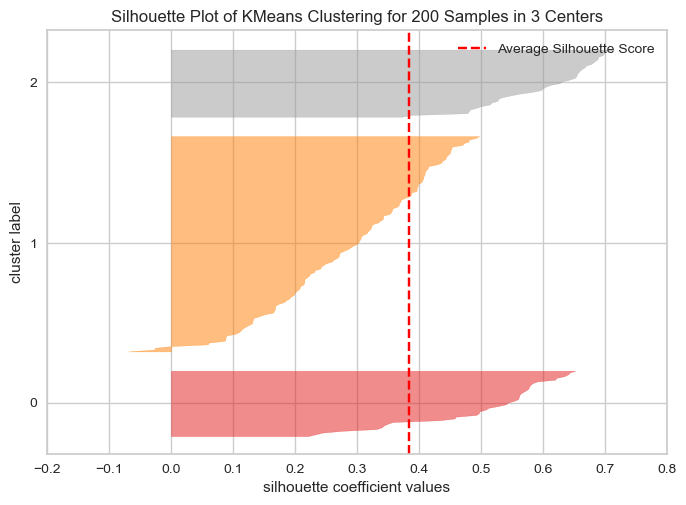

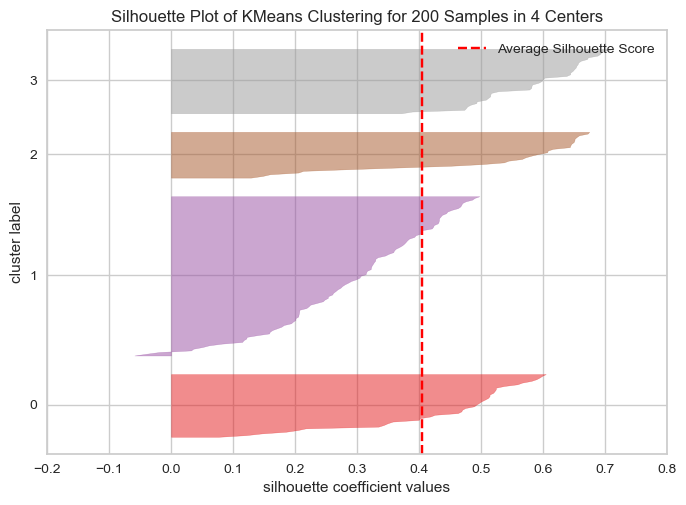

In [64]:
#range
k_range = range(1, 15)

#KElbowVisualizer and fit
elbow_visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=k_range)
elbow_visualizer.fit(X)

#elbow plot
elbow_visualizer.show()

#SilhouetteVisualizer
for n_clusters in range(2, 5):
    silhouette_visualizer = SilhouetteVisualizer(KMeans(n_clusters=n_clusters, init='k-means++', random_state=42))
    silhouette_visualizer.fit(X)
    silhouette_visualizer.show()


## (e) Use sklearn function AgglomerativeClustering() to perform agglomerative hierarchical clustering on the data, with n clusters=5 and linkage=‘average’ and compute full tree=True. Print the clustering labels. Plot the ‘Spending Score (1-100)’ (Y axis) in terms of ‘Annual Income (k)’ (X axis) for the 5 clusters shown by different colors (See the code from lab session). (5 points)

Agglomerative Clustering Labels:
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


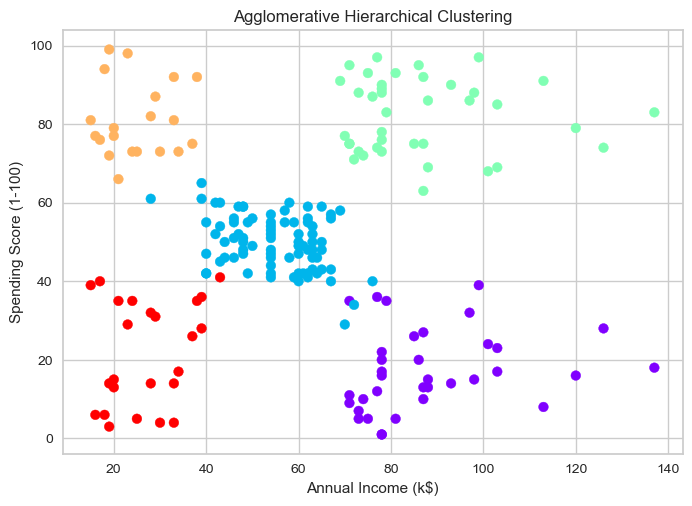

In [66]:
#perform agglomerative hierarchical clustering
n_clusters = 5
linkage_type = 'average'
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_type)
agg_clustering.fit(X)

#labels
print("Agglomerative Clustering Labels:")
print(agg_clustering.labels_)

#plot
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=agg_clustering.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

## (f) Use the linkage() and dendrogram() functions from scipy to plot the hierarchical clustering dendrograms using ‘complete’ linkage, and Euclidean distance as the dissimilarity measure. (4 points)

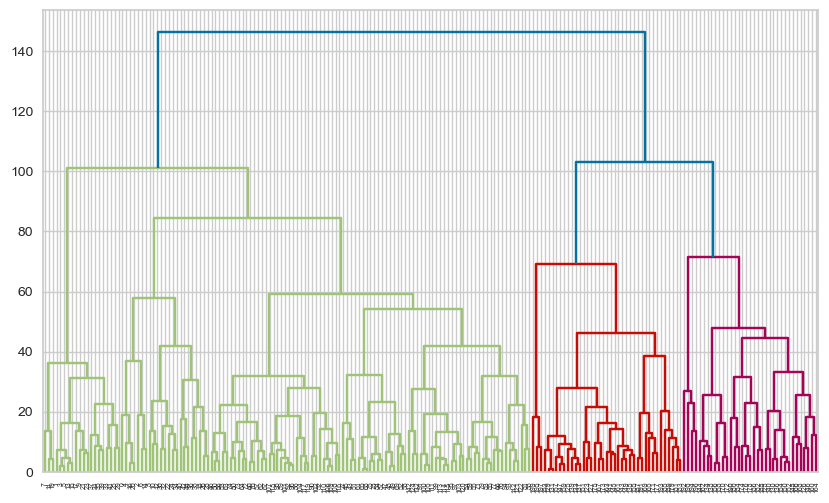

In [71]:
hc_den = linkage(X, method='complete', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(hc_den)
plt.show()

## (g) Use cut tree() function from scipy to determine the cluster labels for each observation associated with 3 number of clusters in dendrogram. (2 points)

In [72]:
labels = cut_tree(hc_den, n_clusters=3)
print(labels)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]]